<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest Project-Adult

Ensemble methods are a type of machine learning technique where multiple models are combined to improve the overall performance and generalization of the system. The main idea behind ensemble methods is that combining multiple models can often lead to better results than using a single model. Here are some common types of ensemble methods:

1- Bagging (Bootstrap Aggregating):
Example: Random Forest is a popular bagging algorithm that builds multiple decision trees and combines their predictions.

2- Boosting:
Example: AdaBoost (Adaptive Boosting),XGBoost (Extreme Gradient Boosting) and Gradient Boosting Machines (GBM) are common boosting algorithms.

3- Stacking (Stacked Generalization):
Example: Train multiple algorithms like decision trees, support vector machines, and neural networks, and then use another model (meta-model) to combine their outputs.

## About Random Forest Algorithm
Random Forest is an ensemble learning algorithm that combines the predictions of multiple decision trees to improve overall performance and accuracy.
Random Forest is widely used in practice due to its simplicity, effectiveness, and ability to handle a range of tasks. It's a go-to algorithm for many machine learning applications, especially when dealing with structured data.

##Pros of Random Forest:

-High Accuracy:
Random Forest often provides high accuracy and generalization on a variety of tasks.

-Reduced Overfitting:
The ensemble nature and the use of bagging help reduce
overfitting, making Random Forest more robust to noise in the data.

-Versatility:
It can be applied to both classification and regression problems, making it versatile for various types of tasks.

##Cons of Random Forest:

-Computational Complexity:
Random Forest can be computationally expensive, especially for large ensembles or deep trees.

-Less Interpretable:
While it provides feature importance, interpreting the individual decision trees in the ensemble can be challenging, making it less interpretable than a single decision tree.

-Memory Usage:
The memory footprint of a Random Forest model can be relatively large, especially with a large number of trees.

## About Dataset

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

Fields

The dataset contains 16 columns
Target filed: Income

-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14

-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

## Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get Dataset

In [2]:
df = pd.read_csv('adult.csv')

## EDA

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.income.unique()

## Check the Target Distribution

In [20]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

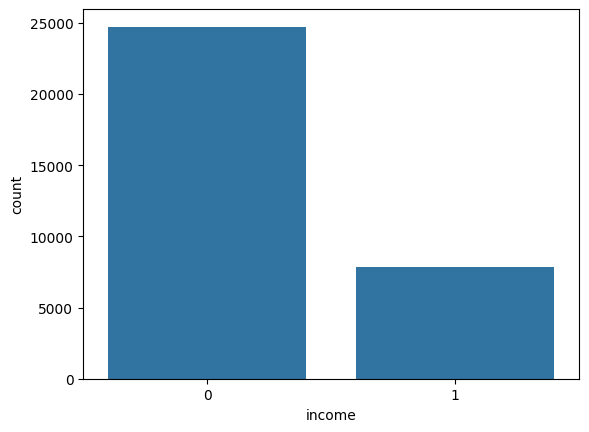

In [21]:
sns.countplot(data=df,x='income');

### The target values are imbalance. Using ROC/AUC (Receiver Operating Characteristic / Area Under the Curve) can be a good choice when dealing with imbalanced datasets.

 ## Convert the target variable to binary labels

In [9]:
df['income']=np.where(df['income'] == '<=50K',0,1)

## Convert Categorical to Numerical

In [13]:
cat_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
df =pd.get_dummies(df,columns=cat_cols)

## Train Test Split

In [15]:
X = df.drop('income',axis=1)
y = df.income

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
RFC=RandomForestClassifier(n_estimators=200,random_state=101)

In [26]:
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=101)

In [27]:
y_pred_rf=RFC.predict(X_test)

## Evaluation of Random Forest Model

In [33]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_auc_score,roc_curve

In [29]:
cm = confusion_matrix(y_test,y_pred_rf)
cr = classification_report(y_test,y_pred_rf)
print(cm)
print(cr)

[[4583  393]
 [ 593  944]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4976
           1       0.71      0.61      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



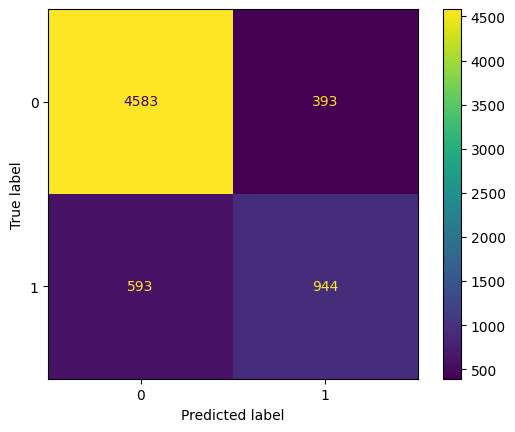

In [30]:
dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot();

In [35]:
y_proba = RFC.predict_proba(X_test)[:,1]

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
auc_rf_score = roc_auc_score(y_test, y_proba)
print(auc_rf_score)

0.900490408613263


## About XGboost:

XGBoost (eXtreme Gradient Boosting) is a popular machine learning algorithm that belongs to the ensemble learning family. It is particularly effective for structured/tabular data and has been successful in various machine learning competitions.

XGBoost is a powerful algorithm that combines the strengths of decision trees, boosting, and regularization to create an accurate and robust predictive model. Its flexibility, efficiency, and ability to handle large datasets make it widely used in various machine learning applications.

## Build XGboost Model

In [37]:
import xgboost as xgb

In [38]:
xgbc=xgb.XGBClassifier()

In [39]:
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred_xgb = xgbc.predict(X_test)

## Evaluation of XGboost Model

In [42]:
cm = confusion_matrix(y_test,y_pred_xgb)
cr = classification_report(y_test,y_pred_xgb)
print(cm)
print(cr)

[[4684  292]
 [ 553  984]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4976
           1       0.77      0.64      0.70      1537

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



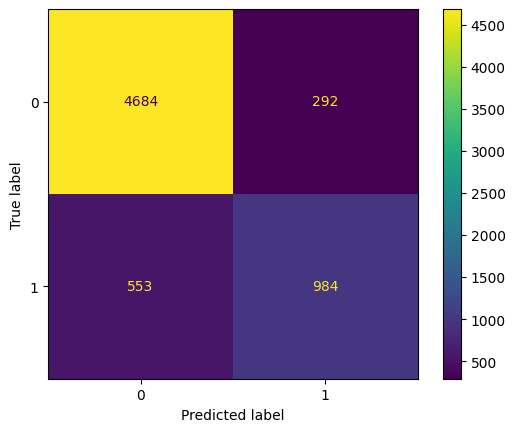

In [43]:
dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot();

In [45]:
y_proba = xgbc.predict_proba(X_test)[:,1]

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
auc_rf_score = roc_auc_score(y_test, y_proba)
print(auc_rf_score)

0.9280494977061005


## Results:


Random Forest Model:

Precision: The precision is 0.89 for class 0 and 0.71 for class 1.

Recall: The recall is 0.92 for class 0 and 0.61 for class 1.

F1-score: The F1-score is 0.90 for class 0 and 0.66 for class 1.

Support: The support is 4976 for class 0 and 1537 for class 1.

Accuracy: Overall correct predictions divided by the total number of predictions is 0.85.


XGBoost Model:

Precision: The ability of the model to correctly identify positive instances among all instances predicted as positive is 0.89 for class 0 and 0.77 for class 1.

Recall: The ability of the model to correctly identify all actual positive instances is 0.94 for class 0 and 0.64 for class 1.

F1-score: The harmonic mean of precision and recall is 0.92 for class 0 and 0.70 for class 1.

Support: The number of actual occurrences of the class in the specified dataset is 4976 for class 0 and 1537 for class 1.

Accuracy: Overall correct predictions divided by the total number of predictions is 0.87.


Comparison:

The XGBoost model generally performs better than the Random Forest model across precision, recall, and F1-score for both classes.
XGBoost has a higher accuracy of 0.87 compared to Random Forest with an accuracy of 0.85.

In summary, based on these metrics, the XGBoost model seems to be a better performer for the given task compared to the Random Forest model.

## More Tasks:


## Build Logestic Regression Model


## Build KNN Model

## Build Naive Bayes Model